In [1]:
import numpy as np
from numpy import exp,log,sign,random,tanh
from matplotlib import pyplot as plt

In [2]:
# MLP
learning_rate=0.9
k=1e-3
batch_size=32
epoch_num=200
input_size=2
output_size=3
def sigmoid(x):
    return 1/(1+exp(-x))
def forward(x):
    w1=mp['w1']
    b1=mp['b1']
    w2=mp['w2']
    b2=mp['b2']
#     b1*=0
#     b2*=0
    z1=w1@x+b1
    a1=tanh(z1)
    z2=w2@a1+b2
    a2=sigmoid(z2)
    mp['z1']=z1
    mp['a1']=a1
    mp['z2']=z2
    mp['a2']=a2
    return a2
def compute_loss(y):
    w1=mp['w1']
    w2=mp['w2']
    a2=mp['a2']
    return np.mean(-(y*log(a2)+(1-y)*log(1-a2)))+k*(np.linalg.norm(w1,ord=1)+np.linalg.norm(w2,ord=1))
def backward(x,y):
    w1=mp['w1']
    b1=mp['b1']
    w2=mp['w2']
    b2=mp['b2']
    z1=mp['z1']
    a1=mp['a1']
    z2=mp['z2']
    a2=mp['a2']
    dz2=a2-y
    dw2=dz2@a1.T/x.shape[1]
    db2=np.mean(dz2,axis=1,keepdims=True)
    da1=w2.T@dz2
    dz1=(1-a1*a1)*da1
    dw1=dz1@x.T/x.shape[1]
    db1=np.mean(dz1,axis=1,keepdims=True)
    w2-=learning_rate*dw2+k*sign(w2)
    b2-=learning_rate*db2
    w1-=learning_rate*dw1+k*sign(w1)
    b1-=learning_rate*db1
    mp['w1']=w1
    mp['b1']=b1
    mp['w2']=w2
    mp['b2']=b2
def logistic_fit(X,Y):
    global mp
    mp={}
    XX=X.copy()
    YY=Y.copy()
    w1=(random.randn(input_size,output_size)*0.01).T
    b1=(random.randn(1,output_size)*0.01).T
    w2=(random.randn(output_size,1)*0.01).T
    b2=(random.randn(1,1)*0.01).T
    mp['w1']=w1
    mp['b1']=b1
    mp['w2']=w2
    mp['b2']=b2
    I=list(range(len(XX)))
    LOSS=[]
    for epoch in range(epoch_num):
        loss=0
        random.shuffle(I)
        XX=XX[I]
        YY=YY[I]
        for i in range(0,len(XX),batch_size):
            x=XX[i:i+batch_size].T
            y=YY[i:i+batch_size].reshape(1,-1)
            forward(x)
            loss+=compute_loss(y)
            backward(x,y)
        LOSS.append(loss)
        print('epoch',epoch,':')
        print(mp['w1'])
        print(mp['b1'])
    return LOSS
def logistic_predict(X):
    return np.where(forward(X.T)>0.5,1,0).T
    
# StandardScaler
def scaler_fit(X):
    global mean,scale
    mean=X.mean(axis=0)
    scale=X.std(axis=0)
    scale[scale<np.finfo(scale.dtype).eps]=1.0
def scaler_transform(X):
    return (X-mean)/scale

# PolynomialFeatures
degree=3
def poly_transform(X):
    XX=X.T
    ret=[np.repeat(1.0,XX.shape[1]),XX[0],XX[1]]
    for i in range(2,degree+1):
        for j in range(0,i+1):
            ret.append(XX[0]**(i-j)*XX[1]**j)
    return np.array(ret).T

In [3]:
def train(X,Y):
    XX=X.copy()
    scaler_fit(XX)
    XX=scaler_transform(XX)
    LOSS=logistic_fit(XX,Y)
    plt.plot(list(range(len(LOSS))),LOSS,color='r')
    plt.show()
def predict(X):
    XX=scaler_transform(X)
    return logistic_predict(XX)
def plot_decision_boundary(X,Y):
    x0_min,x0_max=X[:,0].min()-1,X[:,0].max()+1
    x1_min,x1_max=X[:,1].min()-1,X[:,1].max()+1
    m=500
    x0,x1=np.meshgrid(
        np.linspace(x0_min,x0_max,m),
        np.linspace(x1_min,x1_max,m)
    )
    XX=np.c_[x0.ravel(),x1.ravel()]
    Y_pred=predict(XX)
    Z=Y_pred.reshape(x0.shape)
    plt.contourf(x0,x1,Z,cmap=plt.cm.Spectral)
    plt.scatter(X[:,0],X[:,1],c=Y,cmap=plt.cm.Spectral)
    plt.show()

In [4]:
def generate_data(F,l,r,n,y):
    x=np.linspace(l,r,n)
    X=np.column_stack((x,F(x)))
    Y=np.repeat(y,n)
    return X,Y

epoch 0 :
[[ 0.22475705  0.27698382]
 [-0.14793861 -0.18552963]
 [-0.09366472 -0.12491647]]
[[ 0.02175853]
 [-0.006914  ]
 [-0.01892954]]
epoch 1 :
[[ 0.50791699  0.87394507]
 [-0.43888502 -0.71004834]
 [-0.36029975 -0.55712929]]
[[ 0.01068157]
 [-0.00472817]
 [-0.0135994 ]]
epoch 2 :
[[ 0.52662058  0.93149394]
 [-0.46826323 -0.78344434]
 [-0.40450884 -0.64034499]]
[[-0.13838463]
 [ 0.11272135]
 [ 0.07817008]]
epoch 3 :
[[ 0.34653541  0.98513215]
 [-0.32579797 -0.83923649]
 [-0.2996401  -0.69694786]]
[[-0.09090338]
 [ 0.05930488]
 [ 0.02508653]]
epoch 4 :
[[ 0.47534348  0.96601719]
 [-0.43130004 -0.83680917]
 [-0.38690903 -0.70821924]]
[[-0.16771387]
 [ 0.11761805]
 [ 0.06857772]]
epoch 5 :
[[ 0.38174847  0.91215498]
 [-0.34847762 -0.79416062]
 [-0.31746306 -0.67743498]]
[[-0.07345641]
 [ 0.02345996]
 [-0.01932231]]
epoch 6 :
[[ 0.55660031  0.87467913]
 [-0.49418117 -0.77349637]
 [-0.43775689 -0.67187424]]
[[-0.03664142]
 [-0.01047399]
 [-0.04780918]]
epoch 7 :
[[ 0.40609992  0.8664228

 [-2.67727861]]
epoch 97 :
[[ 2.46088975  0.98955563]
 [ 3.6131225  -1.7542474 ]
 [-2.52612054 -0.87367256]]
[[-2.44592175]
 [-0.26156517]
 [-2.83718372]]
epoch 98 :
[[ 2.41824395  0.92862094]
 [ 3.68029523 -1.76620655]
 [-2.59605871 -0.96721347]]
[[-2.56194402]
 [-0.09378844]
 [-2.78126015]]
epoch 99 :
[[ 2.43128719  0.9294655 ]
 [ 3.70423312 -1.79957427]
 [-2.64753077 -1.00258721]]
[[-2.5701121 ]
 [-0.12158086]
 [-2.76001633]]
epoch 100 :
[[ 2.48083402  0.96182383]
 [ 3.70274404 -1.86746703]
 [-2.68145431 -1.03260923]]
[[-2.53170892]
 [-0.12117985]
 [-2.75402821]]
epoch 101 :
[[ 2.51751384  0.9779771 ]
 [ 3.69234828 -1.95012454]
 [-2.7464923  -1.12069061]]
[[-2.50883608]
 [-0.08671763]
 [-2.6932282 ]]
epoch 102 :
[[ 2.4967758   0.94606958]
 [ 3.81424443 -1.77427072]
 [-2.60525131 -0.92100979]]
[[-2.55496948]
 [-0.38018777]
 [-2.96756797]]
epoch 103 :
[[ 2.53845456  0.96755265]
 [ 3.75217748 -1.97989611]
 [-2.77289311 -1.13493041]]
[[-2.52851813]
 [-0.17403958]
 [-2.74682641]]
epoch 1

epoch 158 :
[[ 2.9218011   0.80339635]
 [ 4.43095961 -2.36364375]
 [-3.40118799 -0.95291698]]
[[-2.8231556 ]
 [-0.2430673 ]
 [-3.54739619]]
epoch 159 :
[[ 2.94558579  0.8331198 ]
 [ 4.37234055 -2.43648354]
 [-3.51385169 -1.08398795]]
[[-2.781506  ]
 [-0.25568377]
 [-3.40090083]]
epoch 160 :
[[ 2.93085865  0.82468981]
 [ 4.32759096 -2.51653728]
 [-3.51811725 -1.09116785]]
[[-2.79345954]
 [-0.29478112]
 [-3.40381007]]
epoch 161 :
[[ 2.91284374  0.77870612]
 [ 4.36474395 -2.48872386]
 [-3.50838268 -1.06726519]]
[[-2.85182589]
 [-0.20168864]
 [-3.43802655]]
epoch 162 :
[[ 2.95913332  0.81387533]
 [ 4.36844675 -2.46663631]
 [-3.5475773  -1.08484116]]
[[-2.79344286]
 [-0.26599554]
 [-3.40991032]]
epoch 163 :
[[ 2.96676075  0.8030462 ]
 [ 4.37174922 -2.46320523]
 [-3.55721484 -1.08604155]]
[[-2.80205159]
 [-0.24762569]
 [-3.41292314]]
epoch 164 :
[[ 2.93234621  0.7652533 ]
 [ 4.41971232 -2.40619791]
 [-3.53898497 -1.04932904]]
[[-2.86357667]
 [-0.19570307]
 [-3.45842844]]
epoch 165 :
[[ 2.955

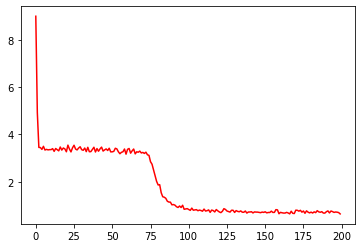

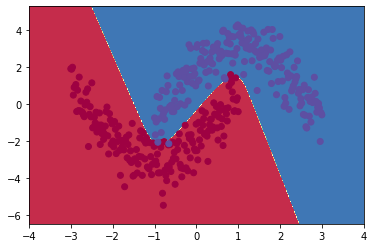

In [5]:
random.seed(114514)
data_size=200
X1,Y1=generate_data(lambda x:x**2+2*x-2+random.randn(data_size)*0.8,-3,1,data_size,0)
X2,Y2=generate_data(lambda x:-x**2+2*x+2+random.randn(data_size)*0.8,-1,3,data_size,1)
X=np.vstack((X1,X2))
Y=np.hstack((Y1,Y2))
train(X,Y)
plot_decision_boundary(X,Y)

In [6]:
mp['w1']

array([[ 3.14052362,  0.7832194 ],
       [ 4.52071346, -2.47253505],
       [-3.77713598, -1.05821521]])

In [7]:
mp['w2']

array([[ 5.67370182, -5.09894011, -5.68986254]])

In [8]:
aa=np.array([1,2,-1,-3,4,-5])

In [9]:
np.where(aa>0.0,1.0,0.0)

array([1., 1., 0., 0., 1., 0.])

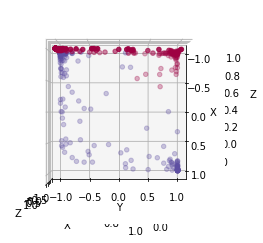

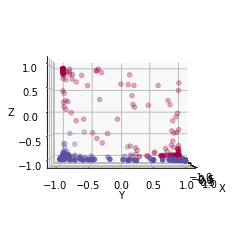

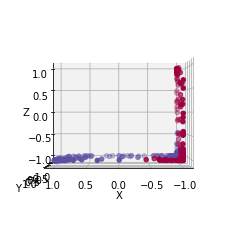

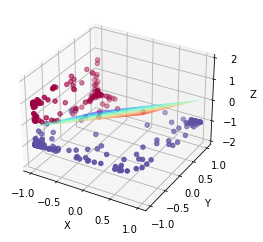

In [10]:
fig = plt.figure()
ax3 = plt.axes(projection='3d')
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
w1=mp['w1']
b1=mp['b1']
w2=mp['w2']
b2=mp['b2']
XX=scaler_transform(X)
z1=w1@XX.T+b1
a1=tanh(z1)
z2=w2@a1+b2
a2=sigmoid(z2) 
Z=a1
ax3 = plt.axes(projection='3d')
ax3.set_xlabel("X")
ax3.set_ylabel("Y") 
ax3.set_zlabel("Z")
ax3.scatter(Z[0],Z[1],Z[2],c=Y,cmap=plt.cm.Spectral)
ax3.view_init(90,0)
plt.show()

ax3 = plt.axes(projection='3d')
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
ax3.scatter(Z[0],Z[1],Z[2],c=Y,cmap=plt.cm.Spectral)
ax3.view_init(0,0)
plt.show()

ax3 = plt.axes(projection='3d')
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
ax3.scatter(Z[0],Z[1],Z[2],c=Y,cmap=plt.cm.Spectral)
ax3.view_init(0,90)
plt.show()


ax3 = plt.axes(projection='3d')
ax3.set_xlabel("X")
ax3.set_ylabel("Y")
ax3.set_zlabel("Z")
ax3.scatter(Z[0],Z[1],Z[2],c=Y,cmap=plt.cm.Spectral)

xx=np.arange(-1,1,0.01)
yy=np.arange(-1,1,0.01)
X2,Y2=np.meshgrid(xx, yy)
Z2=(w2[0,0]*X2+w2[0,1]*Y2+b2[0,0])/(-w2[0,2])
ax3.plot_surface(X2,Y2,Z2,cmap='rainbow')

plt.show()


In [11]:
Z[0].shape

(400,)

In [12]:
Z

array([[-0.99999989, -0.99999988, -0.99999986, ...,  0.98572375,
         0.99557591,  0.99557957],
       [-1.        , -1.        , -1.        , ...,  1.        ,
         0.99999997,  0.99999998],
       [ 0.99180615,  0.99113741,  0.98919902, ..., -1.        ,
        -1.        , -1.        ]])

In [13]:
mp['b1']

array([[-2.88682731],
       [-0.32835231],
       [-3.74393334]])

In [14]:
b2

array([[-0.03863396]])